In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("clean_data_1.csv")
df[:7]

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk
0,0,2,14,2.0,1.000000,39.07,1056.0,2
1,2,0,163,5.0,3.000000,120.00,2600.0,4
2,1,0,6,2.0,3.000000,62.00,1440.0,3
3,0,0,131,3.0,1.000000,95.00,1521.0,3
4,0,0,35,2.0,1.000000,51.00,1200.0,2
5,0,0,0,2.0,1.000000,38.00,1170.0,2
6,0,2,92,4.0,1.584376,204.00,2732.0,4


In [69]:
#sns.pairplot(df)

In [70]:
X = df.drop('price', axis=1).values
X[:4]

array([[0.000e+00, 2.000e+00, 1.400e+01, 2.000e+00, 1.000e+00, 1.056e+03,
        2.000e+00],
       [2.000e+00, 0.000e+00, 1.630e+02, 5.000e+00, 3.000e+00, 2.600e+03,
        4.000e+00],
       [1.000e+00, 0.000e+00, 6.000e+00, 2.000e+00, 3.000e+00, 1.440e+03,
        3.000e+00],
       [0.000e+00, 0.000e+00, 1.310e+02, 3.000e+00, 1.000e+00, 1.521e+03,
        3.000e+00]])

In [71]:
y= df["price"].values
y[:4]

array([ 39.07, 120.  ,  62.  ,  95.  ])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)
 

Shape of X_train =  (10560, 7)
Shape of y_train =  (10560,)
Shape of X_test =  (2640, 7)
Shape of y_test =  (2640,)


In [73]:
"""## Feature Scaling"""
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [74]:
"""## Machine Learning -- Model Training """

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))
 

In [75]:
"""## Random Forest Regressor"""

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg

RandomForestRegressor()

In [76]:
rf_reg.fit(X_train,y_train)
y_pred = rf_reg.predict(X_test)

rf_reg_score = r2_score(y_test, y_pred)
rf_reg_rmse = rmse(y_test, y_pred)
rf_reg_score, rf_reg_rmse

(0.689207296190782, 90.16975539747878)

In [77]:
"""## XGBoost"""

from sklearn.model_selection import KFold,cross_val_score
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.6, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_reg

#cvs = cross_val_score(xgb_reg, X_train,y_train, cv = 10)
#print( cvs, cvs.mean() )
    

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.6, colsample_bytree=1, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.25, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=400, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=1)

In [78]:
xgb_reg.fit(X_train,y_train)
y_pred = xgb_reg.predict(X_test)

xgb_reg_score = r2_score(y_test, y_pred)
xgb_reg_rmse = rmse(y_test, y_pred)
xgb_reg_score, xgb_reg_rmse

[01:50:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[01:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


(0.7837504265309233, 75.2147669115249)

In [79]:
pd.DataFrame([{'Model': 'Random Forest','Score':rf_reg_score, "RMSE":rf_reg_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE'])

,Model,Score,RMSE
0,Random Forest,0.689207,90.169755
1,XGBoost,0.783750,75.214767


In [80]:

Z = X.copy()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(Z)
Z= sc.transform(Z)

y_pred = xgb_reg.predict(Z)
df["price_pred"] =y_pred

In [81]:
df[:20]

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_pred
0,0,2,14,2.0,1.000000,39.07,1056.0,2,42.091393
1,2,0,163,5.0,3.000000,120.00,2600.0,4,236.576080
2,1,0,6,2.0,3.000000,62.00,1440.0,3,59.799812
3,0,0,131,3.0,1.000000,95.00,1521.0,3,95.201195
4,0,0,35,2.0,1.000000,51.00,1200.0,2,57.270195
5,0,0,0,2.0,1.000000,38.00,1170.0,2,54.825176
6,0,2,92,4.0,1.584376,204.00,2732.0,4,204.425339
7,0,0,15,4.0,1.584376,600.00,3300.0,4,436.606049
8,0,0,8,3.0,1.000000,63.25,1310.0,3,70.526520
9,2,0,717,6.0,1.584376,370.00,1020.0,6,218.760773


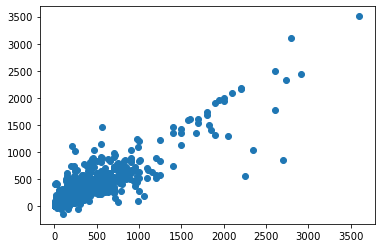

In [82]:
plt.scatter(df["price"], df["price_pred"])

In [83]:
"""# Save model & load model"""
 
import joblib
joblib.dump(xgb_reg, 'bengaluru_house_price_model.pkl')

['bengaluru_house_price_model.pkl']